# Data Prep Insights

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import numpy as np

In [2]:
datadf = pd.read_csv('data.csv')
datadf.head()

,s_no,url,name,abp,lbp,aap,lap,include,polarity,level
0,1,https://www2.ed.gov/policy/rights/guid/ocr/sex...,federal,110,5743,310,312,1,neutral,central
1,2,https://www2.ed.gov/about/offices/list/ocr/doc...,federal,50,1098,200,209,1,neutral,central
2,3,https://www.justice.gov/crt/title-ix#1.%C2%A0%...,federal,200,2672,530,549,1,neutral,central
3,4,https://www.hhs.gov/civil-rights/for-individua...,federal,110,7479,630,448,1,neutral,central
4,5,https://www2.ed.gov/about/offices/list/ocr/sex...,federal,110,6050,290,351,1,neutral,central


In [3]:
temp = datadf.groupby(['polarity'], sort=True).count()['s_no']
temp

polarity
blue       54
neutral     7
red        54
Name: s_no, dtype: int64

<AxesSubplot:xlabel='polarity', ylabel='count'>

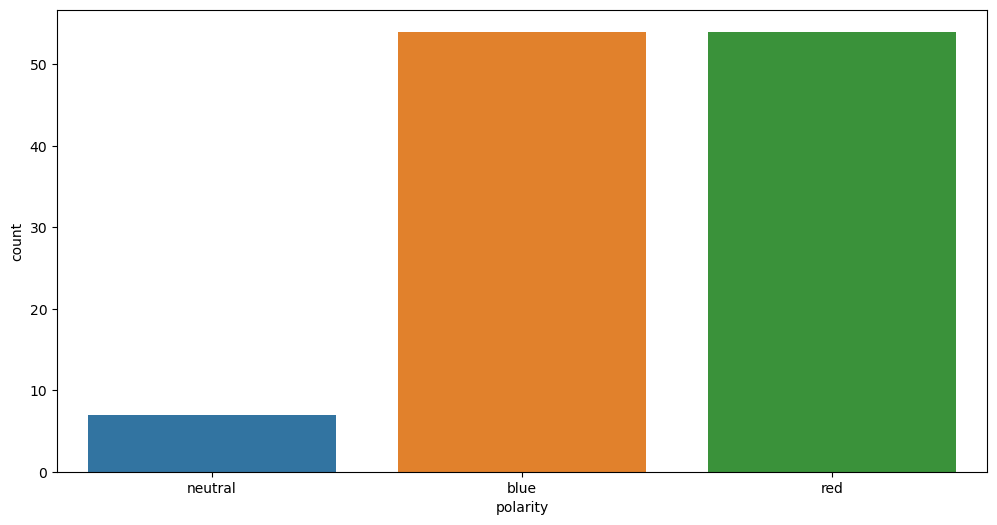

In [4]:
plt.figure(figsize=(12, 6))
sns.countplot(x='polarity', data=datadf)

In [5]:
temp = datadf.groupby(['level'], sort=True).count()['s_no']
temp

level
central        7
state         28
university    80
Name: s_no, dtype: int64

<AxesSubplot:xlabel='level', ylabel='count'>

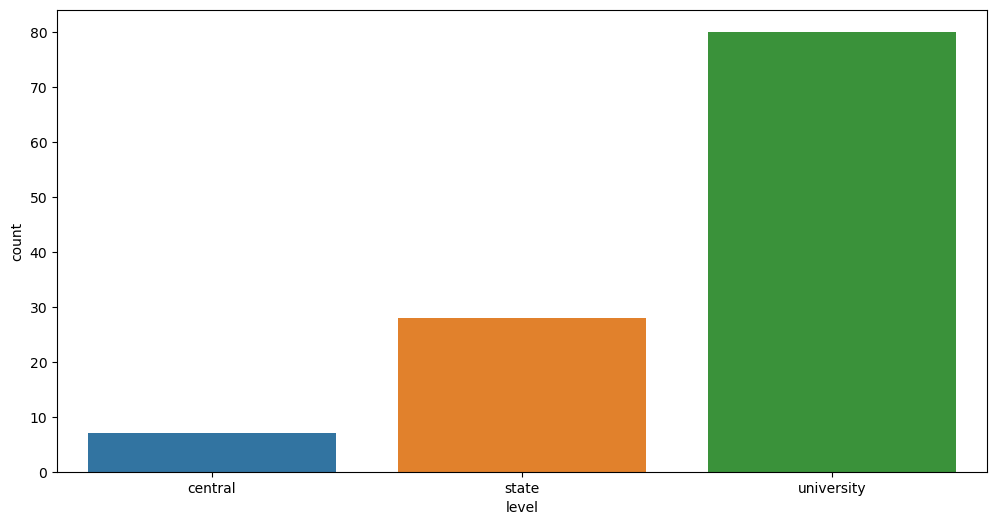

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x='level', data=datadf)

In [7]:
from prep import TextAnalysis

2023-11-21 13:39:10.277519: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-21 13:39:10.334012: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-21 13:39:11.188936: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
ta = TextAnalysis()
ta.orchestrate()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pshar053/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pshar053/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/pshar053/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/pshar053/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


---------------------------------Initial Vector Loading Started-------------------------------------------
---------------------------------Initial Vector Loading Completed-------------------------------------------
Total time taken - 0.798269510269165
---------------------------------Preprocessing Started-------------------------------------------
---------------------------------Preprocessing Completed-------------------------------------------
Total time taken - 311.0632722377777


In [9]:
ta.transformer_models()

---------------------------------Transformer Preprocessing Started-------------------------------------------
---------------------------------Transformer Preprocessing Completed-------------------------------------------
Total time taken - 87.6428771018982


In [10]:
ta.initial_vector['calstate'].keys()

dict_keys(['id', 'name', 'raw_text', 'wp_text', 'text', 'counter_obj', 'most_common', 'least_common', 'stem', 'lemma', 'type', 'wptp', 'wpts', 'ftp', 'fts', 'swp', 'sws', 'lwp', 'lws', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'filtered_vader_neg', 'filtered_vader_neu', 'filtered_vader_pos', 'filtered_vader_compound', 'roberta_encoded_text', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'bert_encoded_text', 'pbb_left', 'pbb_center', 'pbb_right'])

In [11]:
df = pd.DataFrame.from_dict(ta.initial_vector.values())
df.head(5)

,id,name,raw_text,wp_text,text,counter_obj,most_common,least_common,stem,lemma,...,filtered_vader_pos,filtered_vader_compound,roberta_encoded_text,roberta_neg,roberta_neu,roberta_pos,bert_encoded_text,pbb_left,pbb_center,pbb_right
0,1,federal,title ix of the education amendments of 1972 ...,title ix of the education amendments of 1972 ...,title ix education amendments 1972 title ix pr...,"{'title': 964, 'ix': 619, 'education': 517, 'a...","{(discrimination, 474), (basis, 354), (program...","{(retweets, 1), (remove, 1), (arrived, 1), (th...",titl ix educ amend 1972 titl ix prohibit discr...,title ix education amendment 1972 title ix pro...,...,0.111,1.0000,"[input_ids, attention_mask]",0.360018,0.599567,0.040415,"[input_ids, token_type_ids, attention_mask]",0.133137,0.428291,0.438571
1,2,calstate,it is the policy of the state of california th...,it is the policy of the state of california th...,policy state california persons regardless gen...,"{'policy': 52, 'state': 125, 'california': 145...","{(harassment, 180), (education, 361), (program...","{(trending, 1), (2022, 1), (intimidaciï¿½n, 1)...",polici state california person regardless gend...,policy state california person regardless gend...,...,0.111,0.9999,"[input_ids, attention_mask]",0.114787,0.825152,0.060061,"[input_ids, token_type_ids, attention_mask]",0.226157,0.564006,0.209837
2,3,texasstate,vocational rehabilitation - title ix coordinat...,vocational rehabilitation title ix coordinato...,vocational rehabilitation title ix coordinator...,"{'vocational': 5, 'rehabilitation': 7, 'title'...","{(commission, 40), (labor, 33), (information, ...","{(truly, 1), (championship, 1), (understood, 1...",vocat rehabilit titl ix coordin texa workforc ...,vocational rehabilitation title ix coordinator...,...,0.116,0.9997,"[input_ids, attention_mask]",0.230396,0.667715,0.101889,"[input_ids, token_type_ids, attention_mask]",0.810862,0.109132,0.080006
3,4,nystate,"&lt;iframe src="" height=""0"" width=""0"" style=""d...",ltiframe src height0 width0 styledisplaynonevi...,ltiframe src height0 width0 styledisplaynonevi...,"{'ltiframe': 22, 'src': 22, 'height0': 22, 'wi...","{(york, 389), (education, 306), (school, 547),...","{(nina, 1), (outten, 1), (elevate, 1), (restri...",ltifram src height0 width0 styledisplaynonevis...,ltiframe src height0 width0 styledisplaynonevi...,...,0.164,1.0000,"[input_ids, attention_mask]",0.286208,0.643550,0.070242,"[input_ids, token_type_ids, attention_mask]",0.924242,0.051199,0.024559
4,5,utahstate,coronavirus (covid-19) information and resourc...,coronavirus covid19 information and resources\...,coronavirus covid19 information resources stat...,"{'coronavirus': 15, 'covid19': 18, 'informatio...","{(information, 205), (reporting, 84), (report,...","{(2007unauthorized, 1), (immigrants, 1), (2008...",coronaviru covid19 inform resourc statewid onl...,coronavirus covid19 information resource state...,...,0.106,-0.9999,"[input_ids, attention_mask]",0.318229,0.637561,0.044210,"[input_ids, token_type_ids, attention_mask]",0.200130,0.743349,0.056521


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,22.0,11.500000,6.493587,1.000000,6.250000,11.500000,16.750000,22.000000
wptp,22.0,0.118424,0.035642,0.059045,0.086638,0.121029,0.142786,0.195751
wpts,22.0,0.399822,0.062153,0.230220,0.378079,0.409331,0.442606,0.478515
ftp,22.0,0.128286,0.038024,0.062736,0.098301,0.126994,0.154536,0.209752
fts,22.0,0.388854,0.069110,0.203159,0.357094,0.396784,0.440229,0.484221
swp,22.0,0.095281,0.049249,0.010417,0.049701,0.098855,0.126319,0.202974
sws,22.0,0.396180,0.075759,0.183112,0.350900,0.411238,0.460360,0.503906
lwp,22.0,0.119338,0.037097,0.066117,0.089737,0.118387,0.142919,0.199545
lws,22.0,0.386818,0.065491,0.203465,0.361424,0.388785,0.439422,0.475344
vader_neg,22.0,0.083091,0.037175,0.022000,0.061500,0.076500,0.102750,0.157000


In [13]:
def polarity(value):
    if value == 'neutral':
        return 0
    elif value == 'red':
        return 1
    elif value == 'blue':
        return 2
    raise NotImplemented

In [14]:
df['polarity'] = df.apply(lambda row : polarity(row['type']), axis = 1)
df.columns

Index(['id', 'name', 'raw_text', 'wp_text', 'text', 'counter_obj',
       'most_common', 'least_common', 'stem', 'lemma', 'type', 'wptp', 'wpts',
       'ftp', 'fts', 'swp', 'sws', 'lwp', 'lws', 'vader_neg', 'vader_neu',
       'vader_pos', 'vader_compound', 'filtered_vader_neg',
       'filtered_vader_neu', 'filtered_vader_pos', 'filtered_vader_compound',
       'roberta_encoded_text', 'roberta_neg', 'roberta_neu', 'roberta_pos',
       'bert_encoded_text', 'pbb_left', 'pbb_center', 'pbb_right', 'polarity'],
      dtype='object')

In [15]:
# wedf = df
# wedf = wedf.drop(['roberta_encoded_text', 'bert_encoded_text'], axis=1)
# wedf.to_json(r'completedf.json')
# wedf = pd.read_json(r'completedf.json')
# wedf.head(5)
# df = wedf

## Plot polarity

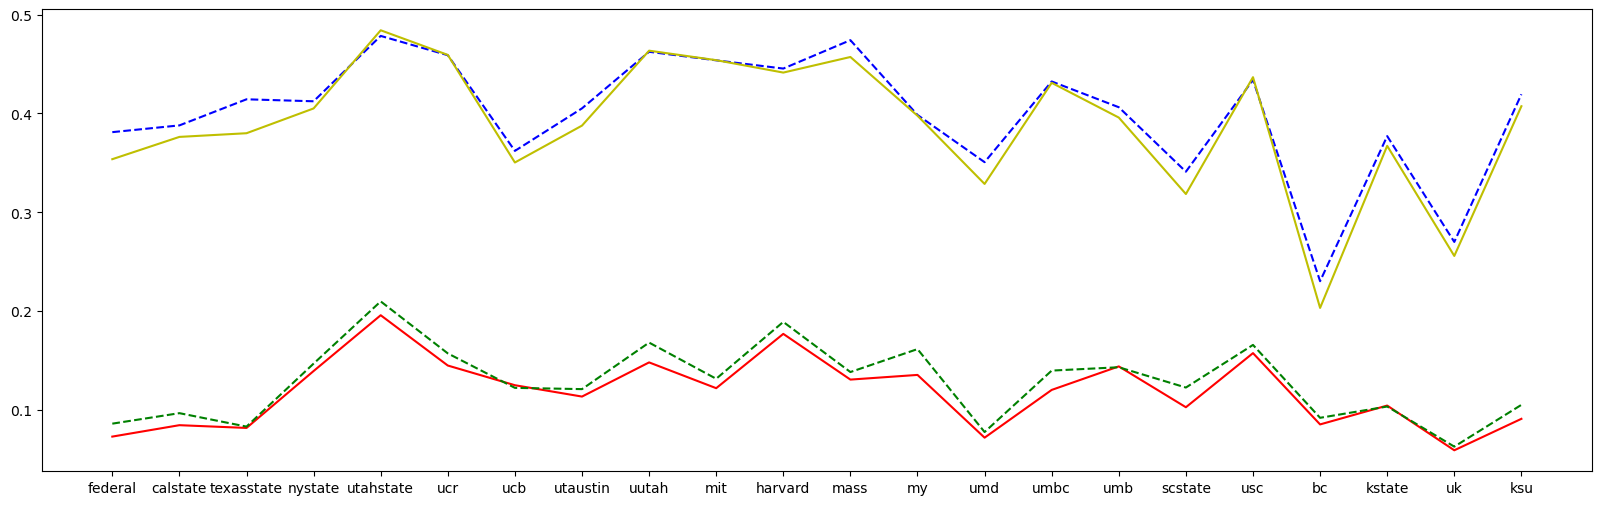

In [16]:
plt.figure(figsize=(20, 6))
plt.plot(df['name'], df['wptp'], 'r-', df['wpts'], 'b--', df['ftp'], 'g--', df['fts'], 'y-')
plt.show()

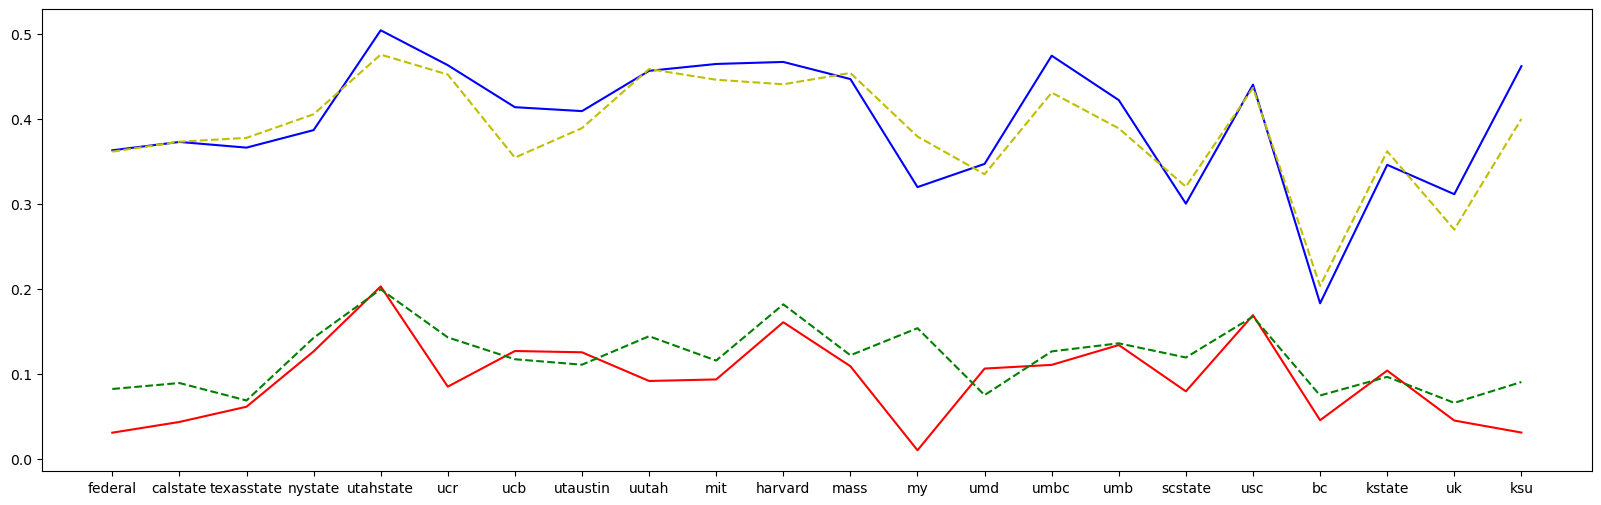

In [20]:
plt.figure(figsize=(20, 6))
plt.plot(df['name'], df['swp'], 'r-', df['sws'], 'b-', df['lwp'], 'g--', df['lws'], 'y--')
plt.show()

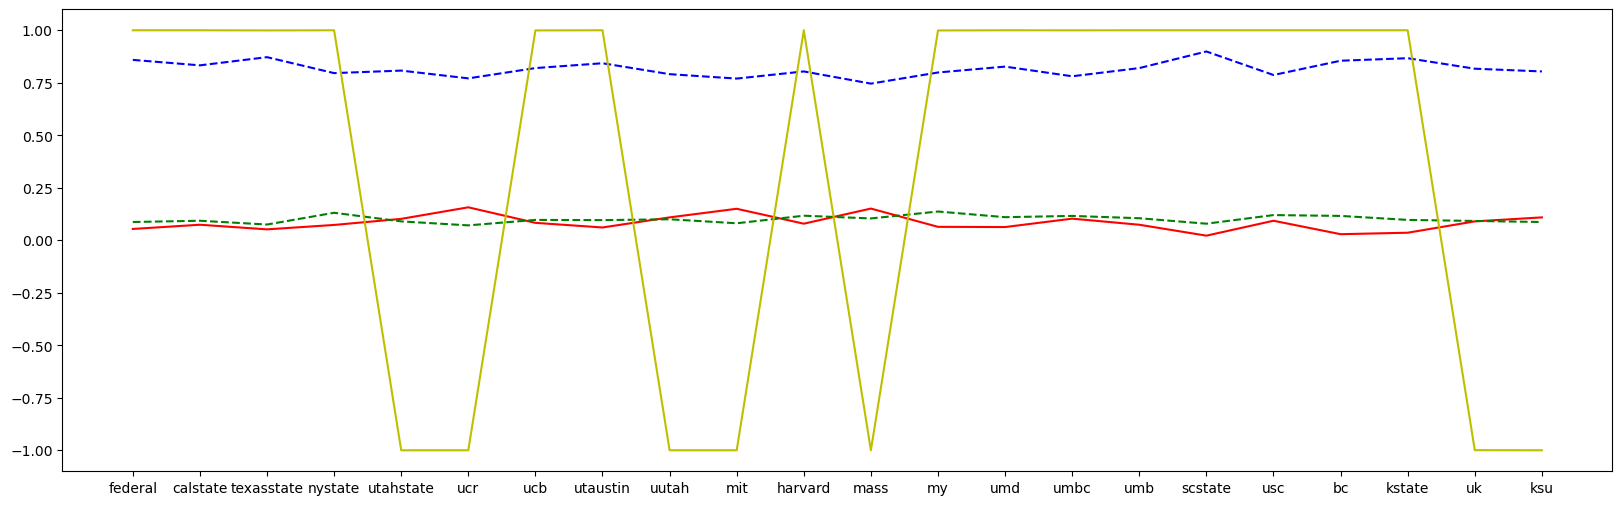

In [21]:
plt.figure(figsize=(20, 6))
plt.plot(df['name'], df['vader_neg'], 'r-', df['vader_neu'], 'b--', df['vader_pos'], 'g--', df['vader_compound'], 'y-')
plt.show()

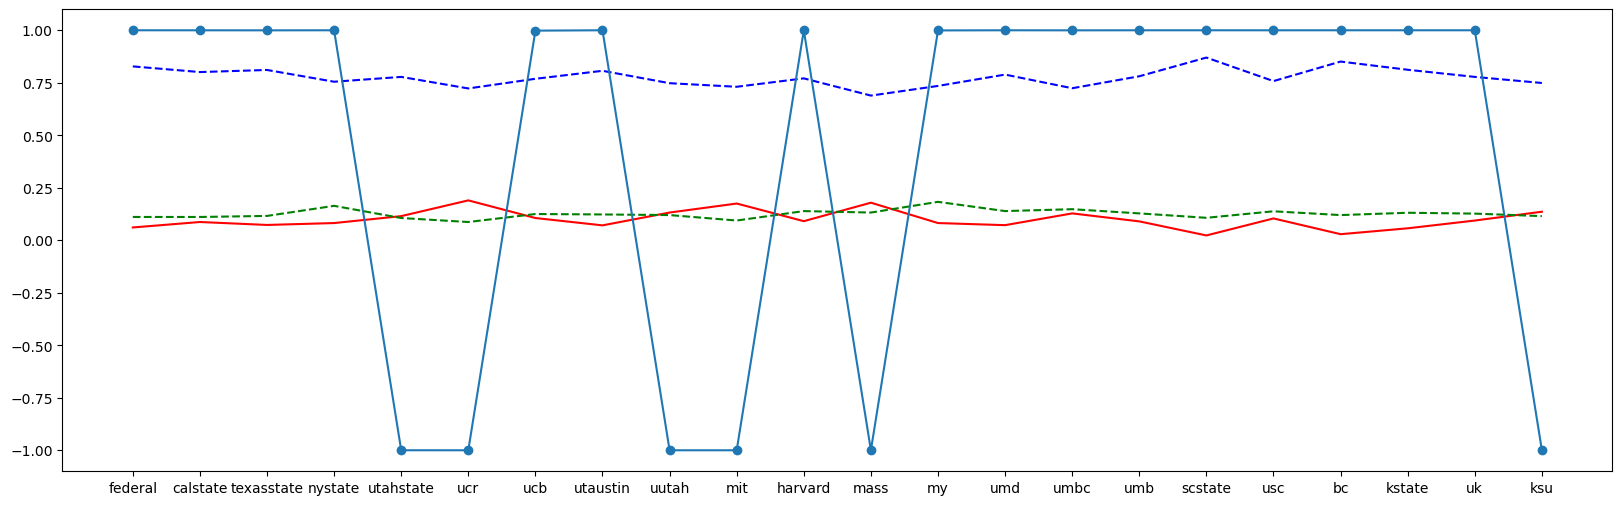

In [22]:
plt.figure(figsize=(20, 6))
plt.plot(df['name'], df['filtered_vader_neg'], 'r-', df['filtered_vader_neu'], 'b--', df['filtered_vader_pos'], 'g--', df['filtered_vader_compound'], 'o-')
plt.show()

## Seaborn Plotting

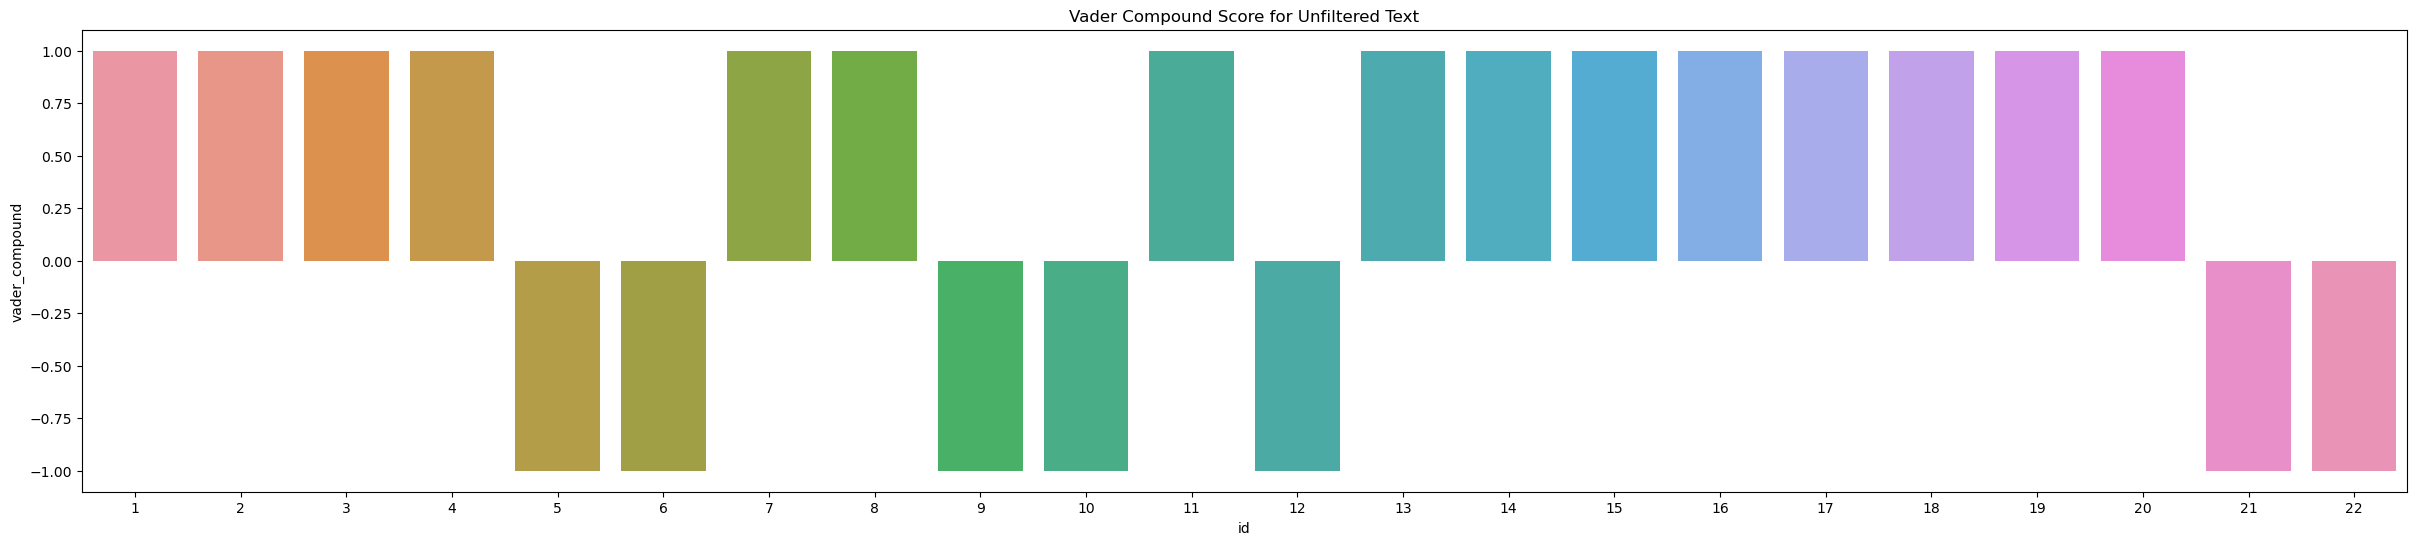

In [23]:
plt.figure(figsize=(30, 6))
ax = sns.barplot(data=df, x='id', y='vader_compound')
ax.set_title('Vader Compound Score for Unfiltered Text')
plt.show()

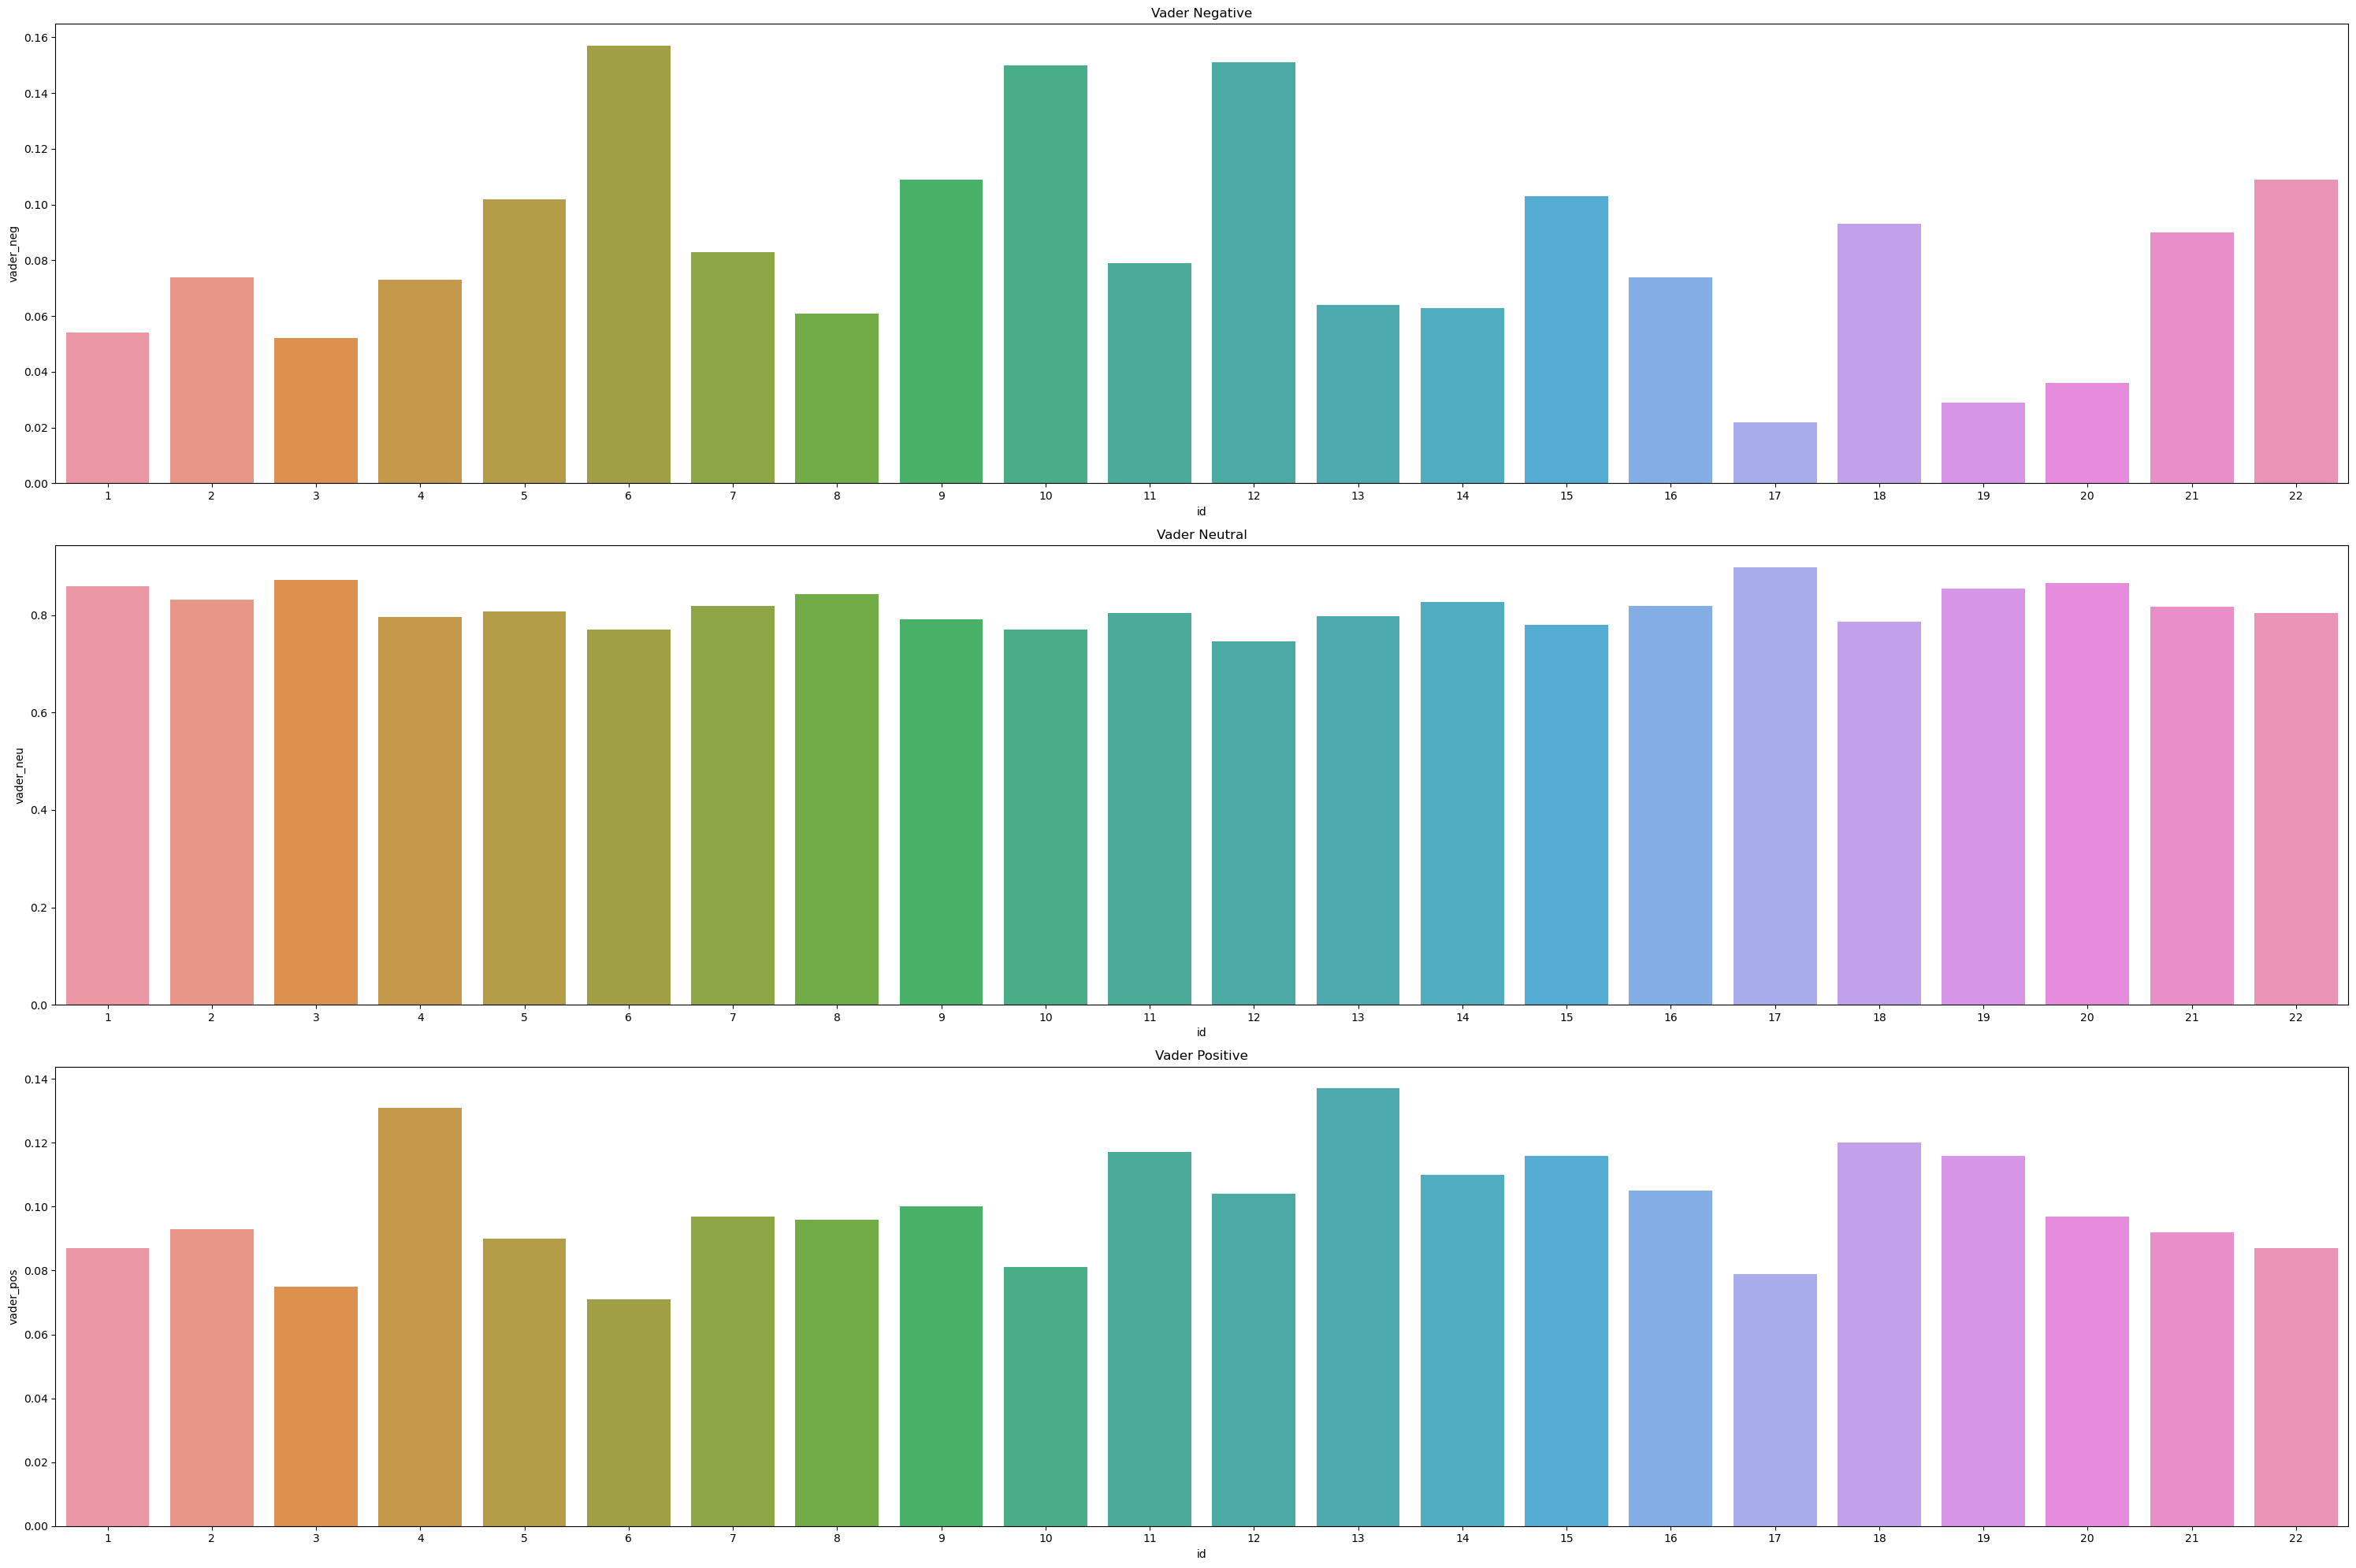

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(30, 20))
sns.barplot(data=df, x='id', y='vader_neg', ax=axs[0])
sns.barplot(data=df, x='id', y='vader_neu', ax=axs[1])
sns.barplot(data=df, x='id', y='vader_pos', ax=axs[2])
axs[0].set_title('Vader Negative')
axs[1].set_title('Vader Neutral')
axs[2].set_title('Vader Positive')
plt.tight_layout()
plt.show()

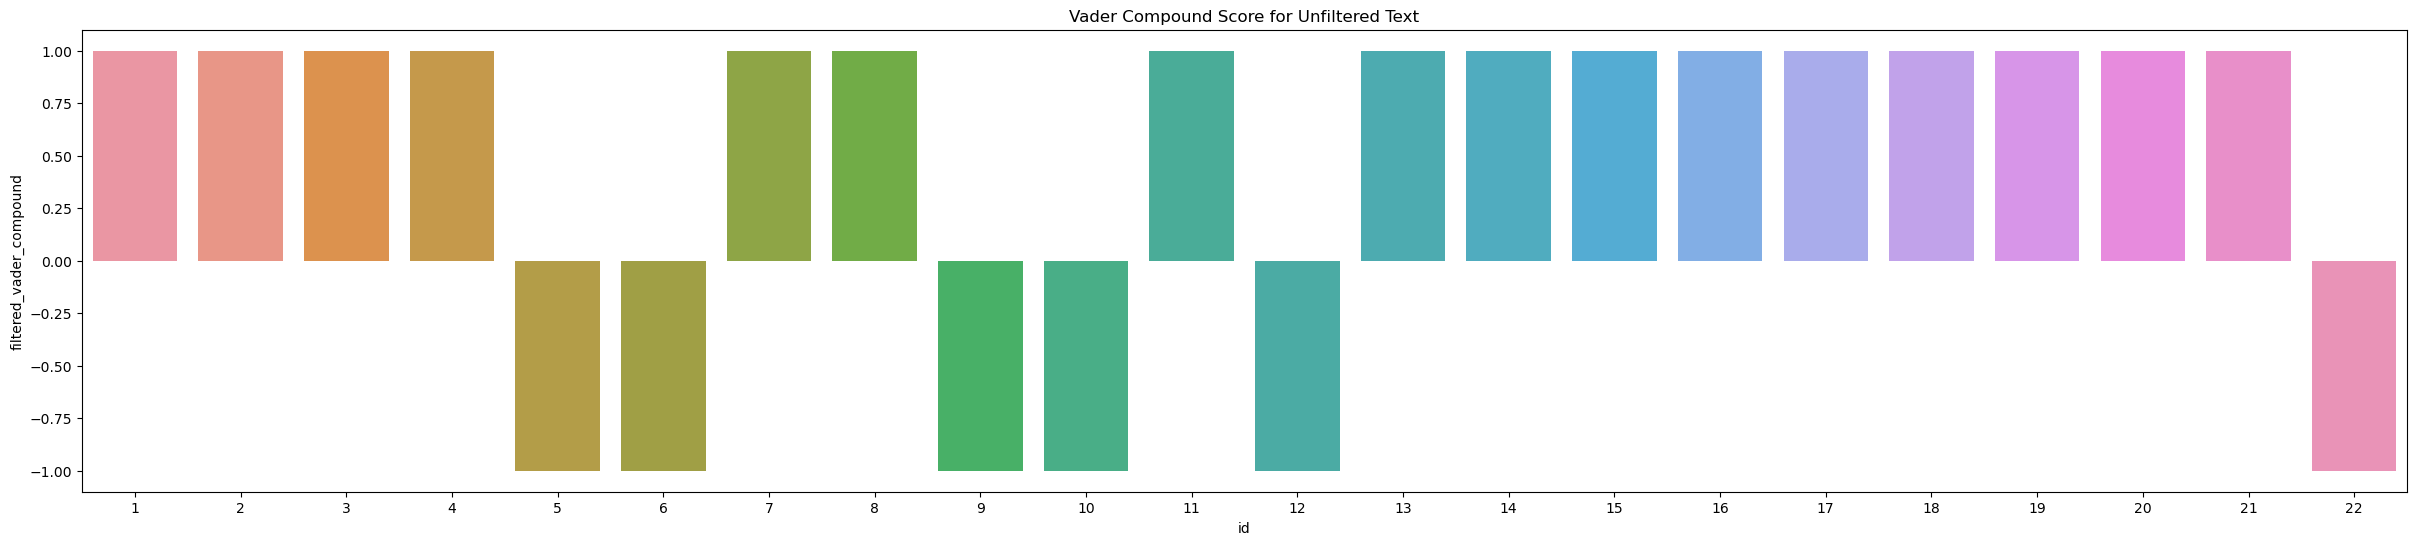

In [25]:
plt.figure(figsize=(30, 6))
ax = sns.barplot(data=df, x='id', y='filtered_vader_compound')
ax.set_title('Vader Compound Score for Unfiltered Text')
plt.show()

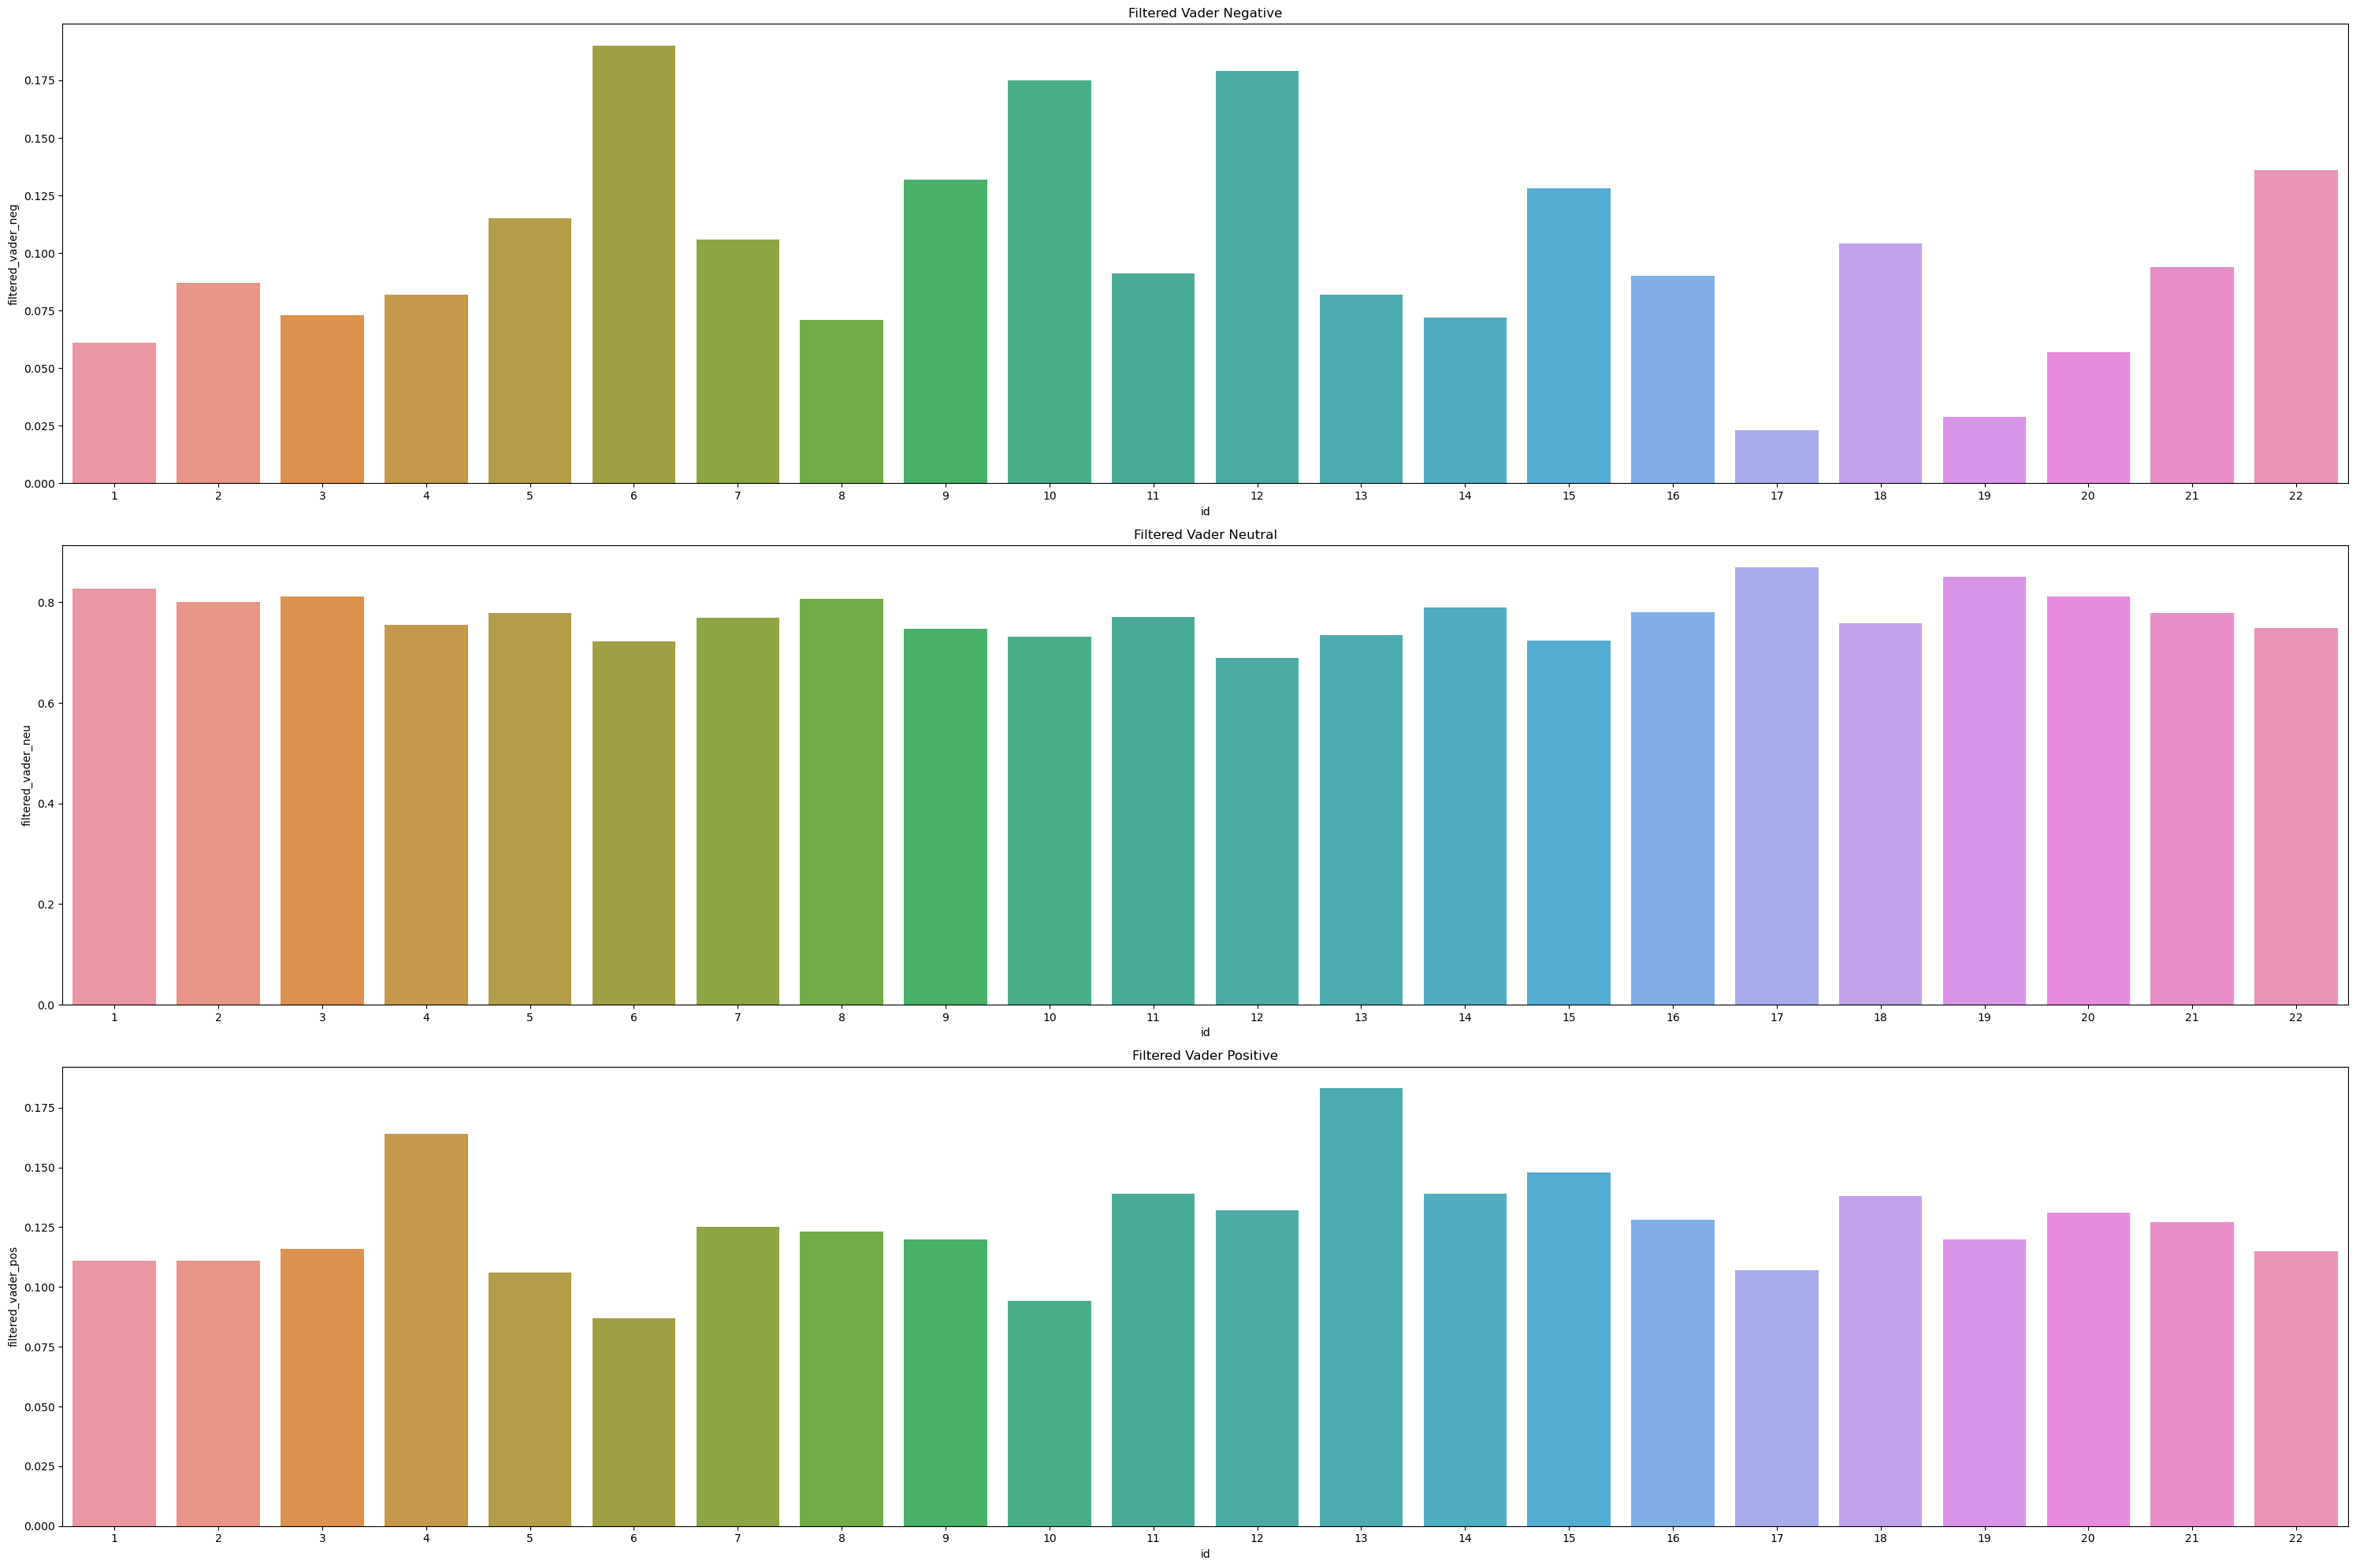

In [26]:
fig, axs = plt.subplots(3, 1, figsize=(30, 20))
sns.barplot(data=df, x='id', y='filtered_vader_neg', ax=axs[0])
sns.barplot(data=df, x='id', y='filtered_vader_neu', ax=axs[1])
sns.barplot(data=df, x='id', y='filtered_vader_pos', ax=axs[2])
axs[0].set_title('Filtered Vader Negative')
axs[1].set_title('Filtered Vader Neutral')
axs[2].set_title('Filtered Vader Positive')
plt.tight_layout()
plt.show()

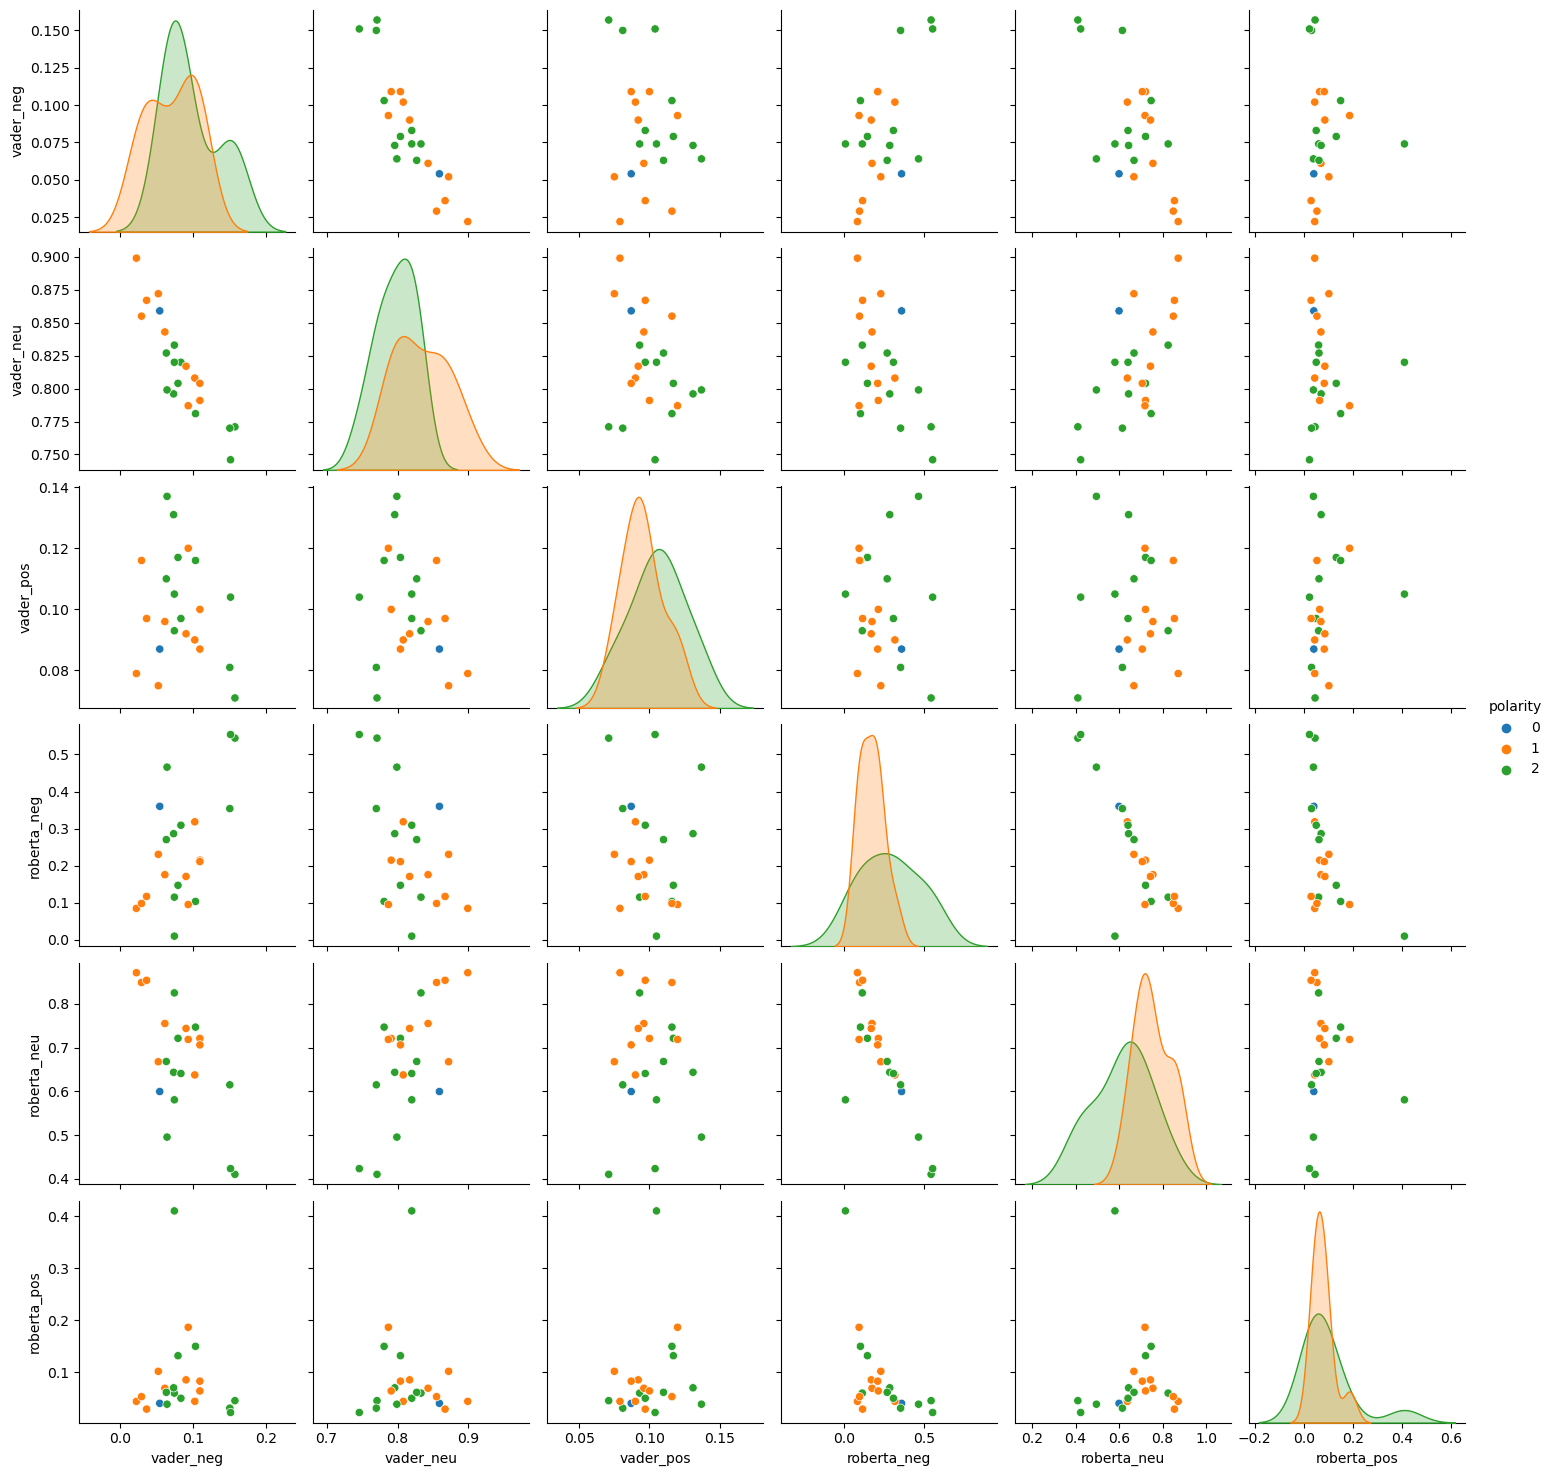

In [27]:
sns.pairplot(data=df,
             vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='polarity',
             palette='tab10')
plt.show()

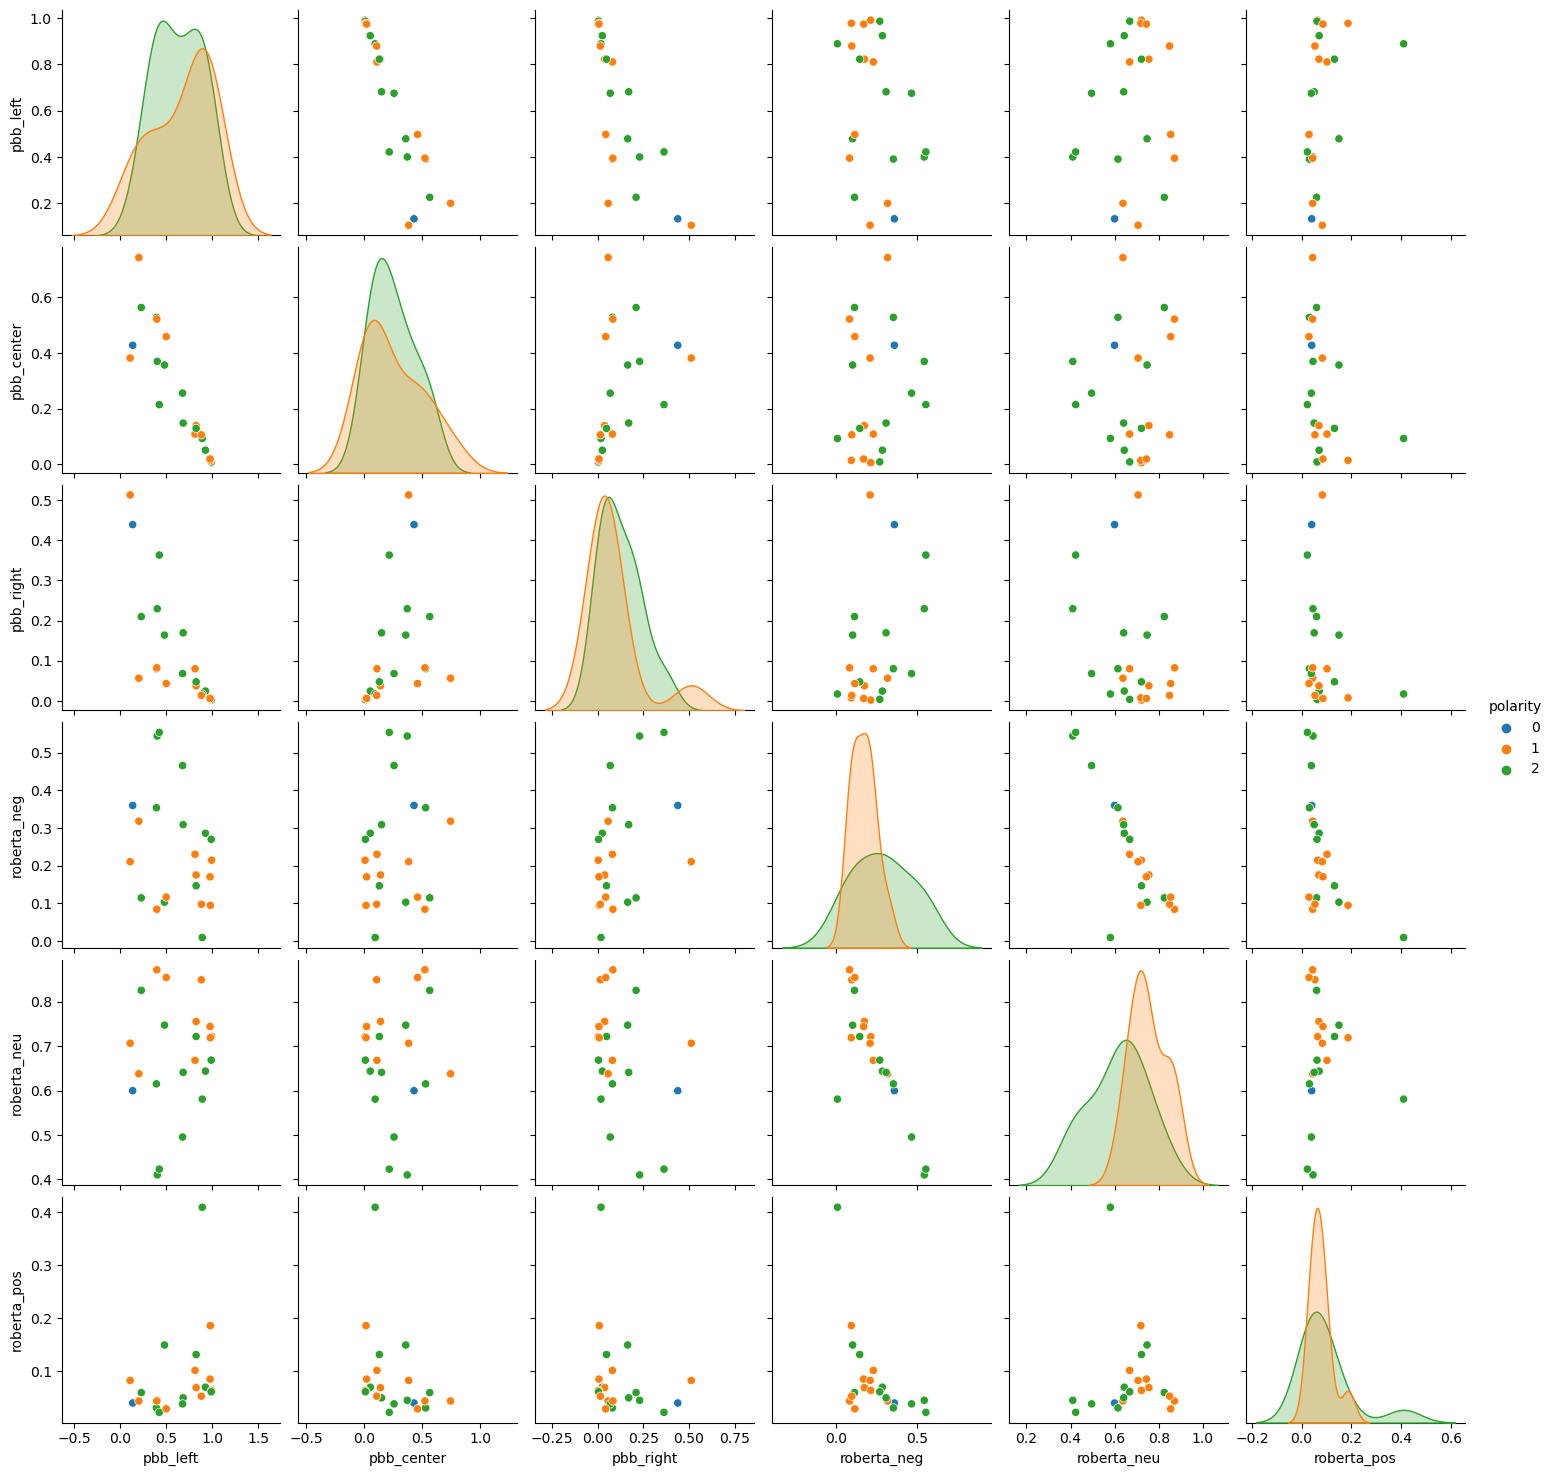

In [28]:
sns.pairplot(data=df,
             vars=['pbb_left', 'pbb_center', 'pbb_right', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='polarity',
             palette='tab10')
plt.show()

## Analysis Part

In [29]:
from sklearn import preprocessing, metrics, linear_model, model_selection, svm

In [30]:
adf = df[['wptp', 'wpts',
        'ftp', 'fts', 'swp', 'sws', 'lwp', 'lws', 'vader_neg', 'vader_neu',
        'vader_pos', 'vader_compound', 'filtered_vader_neg',
        'filtered_vader_neu', 'filtered_vader_pos', 'filtered_vader_compound',
        'roberta_neg', 'roberta_neu', 'roberta_pos', 'pbb_left', 'pbb_center',
        'pbb_right', 'polarity']]
adf.shape

(22, 23)

In [31]:
X = adf[['wptp', 'wpts',
        'ftp', 'fts', 'swp', 'sws', 'lwp', 'lws', 'vader_neg', 'vader_neu',
        'vader_pos', 'vader_compound', 'filtered_vader_neg',
        'filtered_vader_neu', 'filtered_vader_pos', 'filtered_vader_compound',
        'roberta_neg', 'roberta_neu', 'roberta_pos', 'pbb_left', 'pbb_center',
        'pbb_right']]
Y = adf[['polarity']]
X.shape, Y.shape

((22, 22), (22, 1))

## Correlation

<AxesSubplot:>

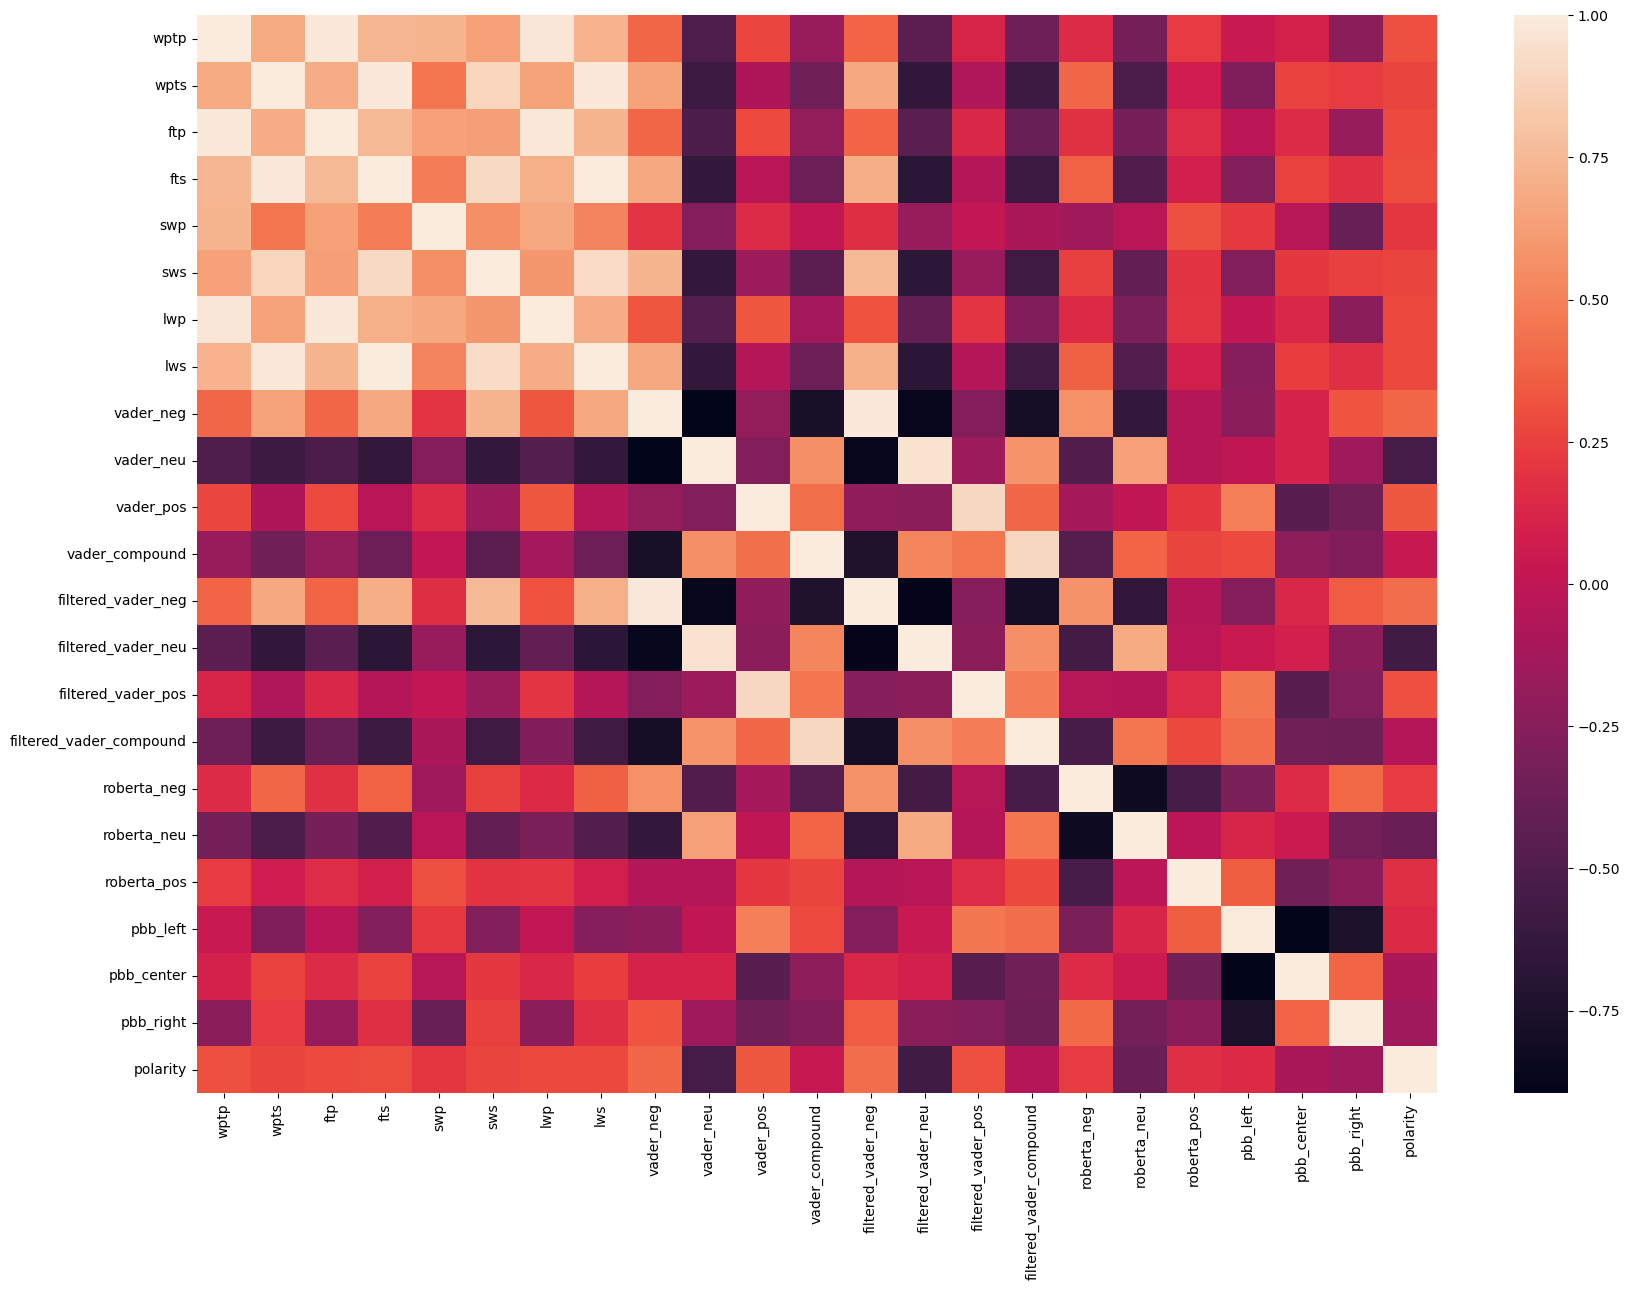

In [32]:
corr = adf.corr()
plt.figure(figsize=(20, 14))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [33]:
adf.corr()['polarity'].sort_values(ascending=False)

polarity                   1.000000
filtered_vader_neg         0.418402
vader_neg                  0.400085
vader_pos                  0.338004
wptp                       0.307143
filtered_vader_pos         0.306032
fts                        0.294429
ftp                        0.282415
lws                        0.278169
lwp                        0.276108
sws                        0.264872
wpts                       0.261601
roberta_neg                0.224003
swp                        0.201221
roberta_pos                0.172514
pbb_left                   0.143150
vader_compound             0.030416
filtered_vader_compound   -0.047945
pbb_center                -0.101808
pbb_right                 -0.146844
roberta_neu               -0.379655
vader_neu                 -0.549882
filtered_vader_neu        -0.570067
Name: polarity, dtype: float64

In [34]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=101) 
model = linear_model.LinearRegression()
model.fit(X_train, Y_train) 
predictions = model.predict(X_test) 
print('mean_squared_error : ', metrics.mean_squared_error(Y_test, predictions)) 
print('mean_absolute_error : ', metrics.mean_absolute_error(Y_test, predictions)) 

mean_squared_error :  7.352208635737404
mean_absolute_error :  2.395032283208946


In [35]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=101) 
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.4444444444444444
Precision: 0.0
Recall: 0.0


/home/pshar053/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pshar053/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.44      1.00      0.62         4

    accuracy                           0.44         9
   macro avg       0.22      0.50      0.31         9
weighted avg       0.20      0.44      0.27         9



/home/pshar053/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pshar053/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pshar053/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


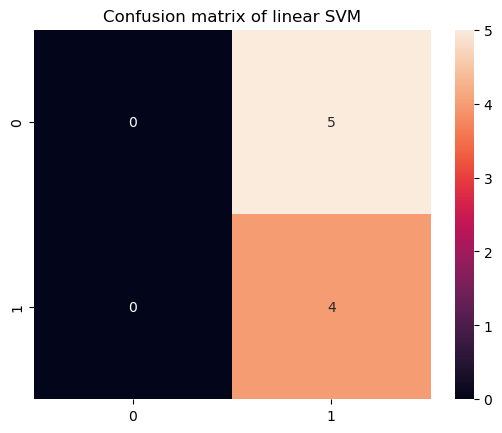

In [36]:
cm = metrics.confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers
print(metrics.classification_report(Y_test,y_pred))

## PoliLearn

In [ ]:
key = list(ta.initial_vector.keys())[0]
value = list(ta.initial_vector.values())[0]

In [ ]:
def chunks(text):
    chunks_list = []
    i = 0
    limit = 4000
    while i < len(text):
        chunks_list.append({'statement': text[i:i+limit]})
        i = i + limit
    return chunks_list

In [ ]:
statement_response_list = []
for key, value in ta.initial_vector.items():
    statement_response = {
        'id': value.get('id'),
        'chunks': chunks(value.get('raw_text'))
    }
    statement_response_list.append(statement_response)
print(len(statement_response_list))
ta.statement_response_list = statement_response_list

In [ ]:
count = 0
for i in ta.statement_response_list:
    count = count + len(i['chunks'])
count

In [ ]:
ta.polilearn_response()

In [ ]:
import json
with open("polilearn/response.jsonl", "w") as f:
    json.dump(ta.statement_response_list, f, indent = 4)

In [ ]:
ta.polilearn_scoring()

In [ ]:
!ls polilearn

In [ ]:
from transformers import pipeline
polilearn_models = ['gpt2']
def polilearn_response(a):
    for model in polilearn_models:
        generator = pipeline("text-generation", model = model, max_new_tokens = 100)
        prompt = "Please respond to the following statement: <statement>\nYour response:"
        for statement_response in a:
            for chunks in statement_response['chunks']:
                try:
                    statement = chunks["statement"]
                    promp = prompt.replace("<statement>", statement)
                    result = generator(promp)
                    chunks["{}_response".format(model)] = result[0]["generated_text"][len(promp)+1:]
                except Exception as e:
                    print("Error - ", e)
        print("---------------------------------PoliLearn Response Completed-------------------------------------------")
    return a
a = polilearn_response(statement_response_list)

In [ ]:
len(a[0]['chunks'])

In [6]:
from transformers import pipeline
polilearn_models = ['gpt2']
def zero_shot_stance(response):
    classifier = pipeline("zero-shot-classification", model = "facebook/bart-large-mnli")
    result = classifier(response, candidate_labels=["agree", "disagree"])
    if result["scores"][result["labels"].index("agree")] > result["scores"][result["labels"].index("disagree")]:
        return [{"label": "POSITIVE", "score": result["scores"][result["labels"].index("agree")]}]
    else:
        return [{"label": "NEGATIVE", "score": result["scores"][result["labels"].index("disagree")]}]

def polilearn_scoring(a):
    count = 0
    for model in polilearn_models:
        for statement_response in a:
            for chunks in statement_response['chunks']:
                try:
                    response = chunks["statement"] + " " + chunks.get("{}_response".format(model), '')
                    result = zero_shot_stance(response)
                    positive = 0
                    negative = 0
                    if result[0]['label'] == 'POSITIVE':
                        positive += result[0]['score']
                        negative += (1-result[0]['score'])
                    elif result[0]['label'] == 'NEGATIVE':
                        positive += (1-result[0]['score'])
                        negative += result[0]['score']
                    else:
                        raise NotImplementedError
                    chunks['{}_agree'.format(model)] = positive
                    chunks['{}_disagree'.format(model)] = negative
                    count = count + 1
                    if count % 50 == 0:
                        print("count - ", count)
                except Exception as e:
                    print("Error, - ", e)
    print("---------------------------------PoliLearn Scoring Completed-------------------------------------------")
#     return a
    with open("polilearn/scoring.jsonl", "w") as f:
        json.dump(a, f, indent = 4)

polilearn_scoring(srl)

count -  50
count -  100
count -  150
count -  200
count -  250
count -  300
count -  350
count -  400
count -  450
count -  500
count -  550
count -  600
count -  650
count -  700
count -  750
count -  800
count -  850
count -  900
count -  950
count -  1000
count -  1050
count -  1100
count -  1150
count -  1200
count -  1250
count -  1300
count -  1350
count -  1400
count -  1450
count -  1500
count -  1550
count -  1600
count -  1650
count -  1700
count -  1750
count -  1800
count -  1850
count -  1900
count -  1950
count -  2000
count -  2050
count -  2100
count -  2150
count -  2200
count -  2250
count -  2300
count -  2350
count -  2400
count -  2450
count -  2500
count -  2550
count -  2600
---------------------------------PoliLearn Scoring Completed-------------------------------------------


In [1]:
import json
with open('polilearn/response.jsonl') as user_file:
    srl = json.load(user_file)
len(srl)

22

In [38]:
ta.statement_response_list = srl
len(ta.statement_response_list)

22

In [ ]:
ta.polilearn_scoring()

In [ ]:
# ta.polilearn_response()

In [ ]:
print()

In [ ]:
import json
with open('polilearn/scoring.jsonl') as user_file:
    srl = json.load(user_file)
len(srl)